# A random walk through Sierpinski Polygons
---
John Cook and Peter Norvig investigated the Sierpinski Triangle using the following recipe...

>Start at a vertex of an equilateral n-gon. Then move to the midpoint between the current point and one of the other vertexes chosen at random. Repeat to create N points, and plot them. What do you get?

Continuing in that spirit, let's see 
- what happens when the new point is not the midpoint, but a fractional step (defined by a ratio r)
- the relationship between the number of sides (n) of the polygon and r 
- what happens when r becomes negative and **more perplexingly when r is -1**


References:

- [John D. Cook](https://www.johndcook.com/blog/2017/07/08/the-chaos-game-and-the-sierpinski-triangle/)
- [Peter Norvig](http://norvig.com)
- Larry Riddle, [_Classic Iterated Function Systems_](http://ecademy.agnesscott.edu/~lriddle/ifs/ifs.htm)
- Schliker & Dennis, [_Sierpinski n-gons_](http://www.pme-math.org/journal/issues/PMEJ.Vol.10.No.2.pdf) 


---

Author: Chandranath Gunjal, 2018

---

Starting with code written by John Cook & Peter Norvig, modify it use a step ratio r instead of the midpoint.

In [2]:
import matplotlib.pyplot as plt
import random
import math
from functools import partial

def transpose(matrix): return zip(*matrix)

def fractionalpoint(p, q, r): return (p[0]*r + q[0]*(1 - r), p[1]*r + q[1]*(1 - r))
midpoint = partial(fractionalpoint, r=0.5)

def random_walk(vertexes, N, stepratio=0.5, start_origin=False):
    """Walk a step of given size from current point towards a random vertex; repeat for N points."""
    points = [(0.0, 0.0)] if start_origin else [vertexes[0]]
    for _ in range(N-1):
        points.append(fractionalpoint(points[-1], random.choice(vertexes), stepratio))
    return points

def show_walk(vertexes, N=5000, stepratio=0.5, start_origin=False):
    """Walk a step of given size towards a random vertex for N points; show results."""
    Xs, Ys = transpose(random_walk(vertexes, N, stepratio, start_origin))
    Xv, Yv = transpose(vertexes)

    plt.plot(Xs, Ys, 'r.')
    plt.plot(Xv, Yv, 'bs')
    plt.gca().set_aspect('equal')
    #plt.show()


Add a routine to compute the vertices of a regular polygon (the offset z ensures that the polygon "sits" on a base)


In [3]:
def polygon(n):
    """Compute the coordinates of a regular n-sided polygon whose vertices lie on a unit circle."""
    z = math.pi / n if n % 2 == 0 else math.pi / 2
    return list((math.cos(2*math.pi*i/n + z), math.sin(2*math.pi*i/n + z)) for i in range(n))

triangle = polygon(3)
square   = polygon(4)
pentagon = polygon(5)
hexagon  = polygon(6)
nonagon  = polygon(9)


### Different step ratios - at the extremes
---

Let's see what happens when r varies from +1 to -1 for different shapes.

r = 0 and r = 1 are degenerate cases where the all the step points either stay at one vertex or switch randomly between them. At r = 0.5 we see the Sierpinski triangle where the miniature triangles touch each other.

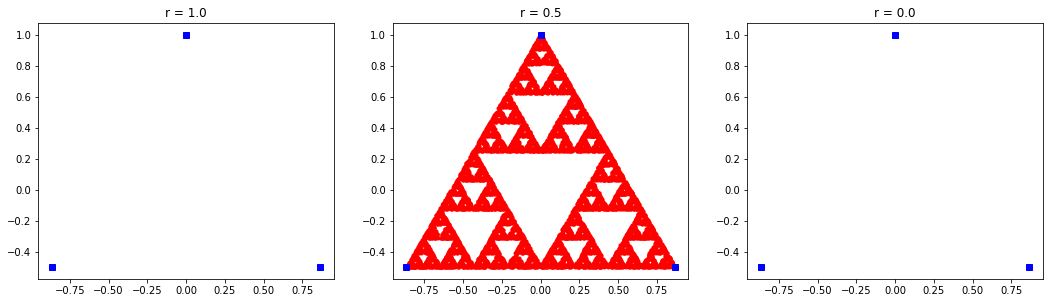

In [4]:
plt.figure(1, figsize=(18,6))

plt.subplot(131); show_walk(triangle, 10000, 1.00); plt.title('r = 1.0')
plt.subplot(132); show_walk(triangle, 10000, 0.50); plt.title('r = 0.5')
plt.subplot(133); show_walk(triangle, 10000, 0.00); plt.title('r = 0.0')
plt.show()

### Ratios near +1.0 and decreasing
---
For r close to 1.0, we see a blob of points which initially fills the centre of the polygon (seemingly attached by a thread? Or breadcrumbs on a trail?)

The blob expands to fill the entire space as r tends towards 0.5. As r approaches 0.5, the Sierpinski triangle slowly emerges. 


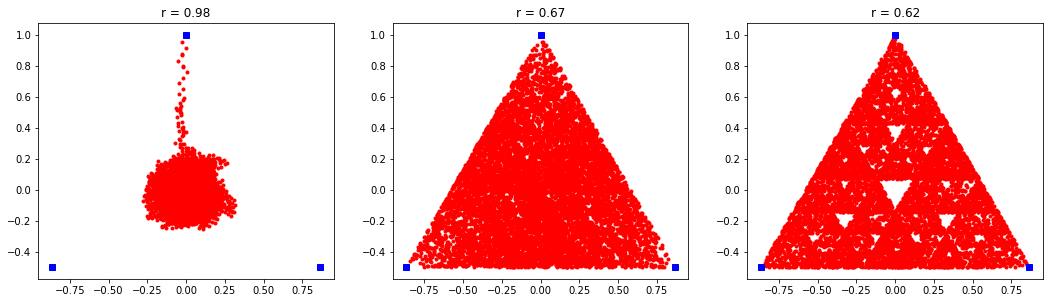

In [5]:
plt.figure(1, figsize=(18,6))

plt.subplot(131); show_walk(triangle, 10000, 0.97); plt.title('r = 0.98')
plt.subplot(132); show_walk(triangle, 10000, 0.67); plt.title('r = 0.67')
plt.subplot(133); show_walk(triangle, 10000, 0.62); plt.title('r = 0.62')
plt.show()

### Different polygons at r = 0.5
---
Blobs everywhere! Some pattern emerging for the pentagon and hexagon...

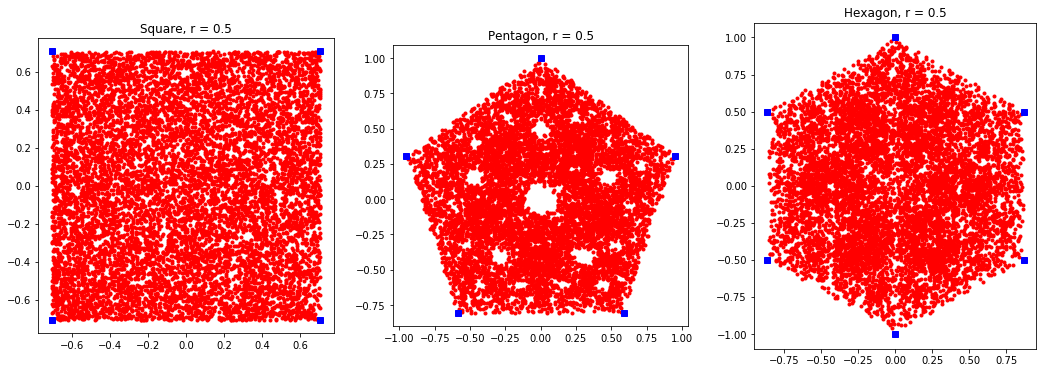

In [6]:
plt.figure(1, figsize=(18, 6))

plt.subplot(131); show_walk(square, 10000, 0.5); plt.title('Square, r = 0.5')
plt.subplot(132); show_walk(pentagon, 10000, 0.5); plt.title('Pentagon, r = 0.5')
plt.subplot(133); show_walk(hexagon, 10000, 0.5); plt.title('Hexagon, r = 0.5')
plt.show()

### Kissing ratio
---

It turns out (see Schliker & Dennis) that each polygon has a different ratio where its gasket is most prominent (i.e. the miniature polygons just touch each other)

So what are these ratios for different polygons?


In [7]:
def kissing_ratio(n):
    """Return ratio r for an n-gon, such that the fractionalpoint ratio r gives kissing n-gons."""
    return 1 / (2*(1 + sum(math.cos(2*math.pi*k/n) for k in range(1, int(n/4) + 1))))
    
for n in range(3, 11):
    r = kissing_ratio(n)
    print('Sides = {:2d}  r = {:.4f}  1/r = {:.4f}'.format(n, r, 1/r))


Sides =  3  r = 0.5000  1/r = 2.0000
Sides =  4  r = 0.5000  1/r = 2.0000
Sides =  5  r = 0.3820  1/r = 2.6180
Sides =  6  r = 0.3333  1/r = 3.0000
Sides =  7  r = 0.3080  1/r = 3.2470
Sides =  8  r = 0.2929  1/r = 3.4142
Sides =  9  r = 0.2578  1/r = 3.8794
Sides = 10  r = 0.2361  1/r = 4.2361


### Polygons at their kissing ratio
---

Now this looks more interesting...

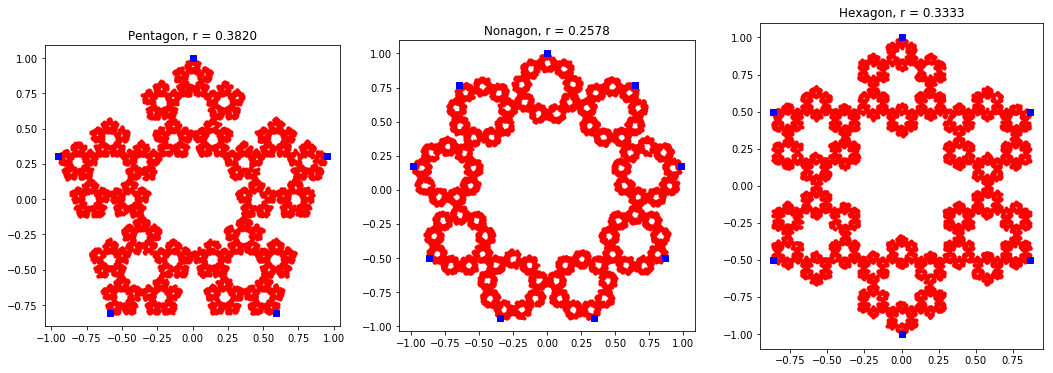

In [8]:
plt.figure(1, figsize=(18, 6))

plt.subplot(131); show_walk(pentagon, 10000, 0.3820); plt.title('Pentagon, r = 0.3820')
plt.subplot(132); show_walk(nonagon, 10000, 0.2578); plt.title('Nonagon, r = 0.2578')
plt.subplot(133); show_walk(hexagon, 10000, 0.3333); plt.title('Hexagon, r = 0.3333')
plt.show()

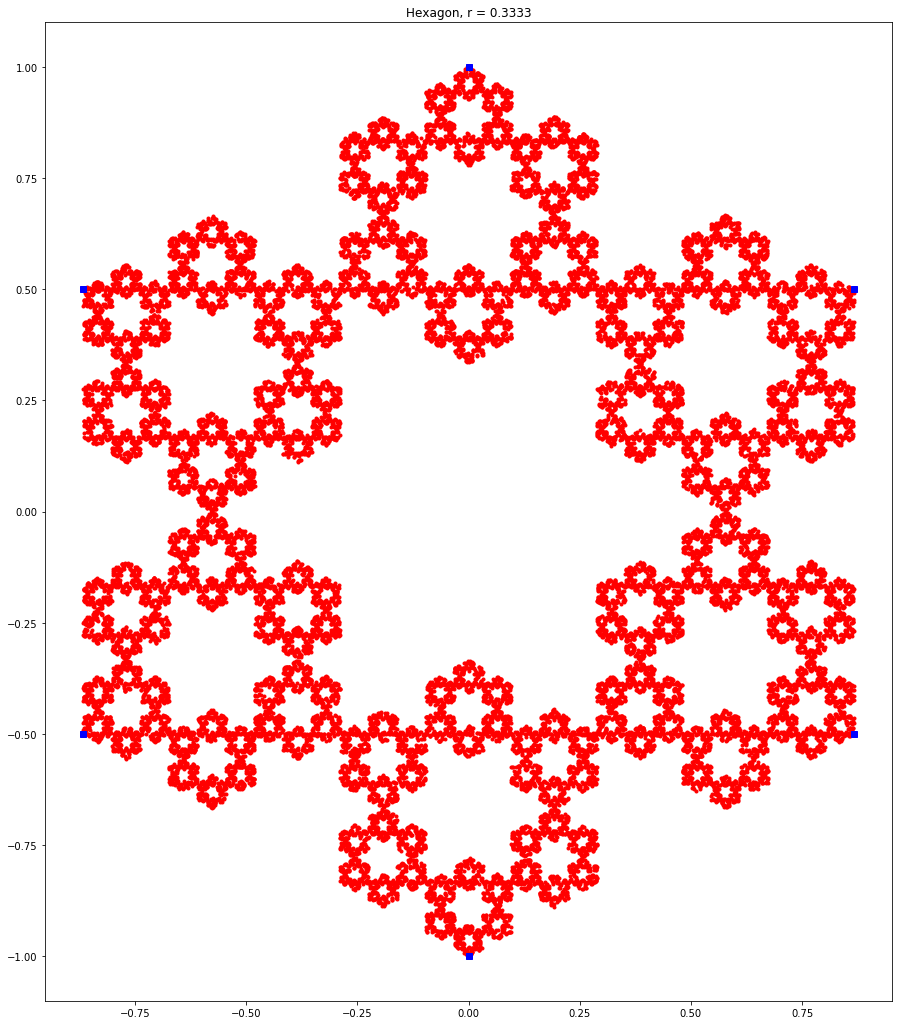

In [9]:
# and the hexagon enlarged ...
plt.figure(1, figsize=(18, 18))

show_walk(hexagon, 40000, 1./3); plt.title('Hexagon, r = 0.3333')
plt.show()

### Why is the square... so square?
---
Maybe it is because the miniature squares touch each other along the sides unlike the other poygons which touch at a vertex. With r just below 0.5...

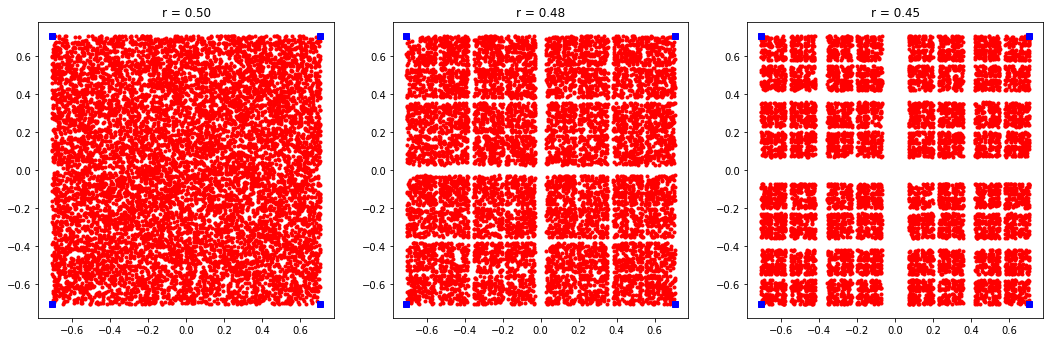

In [10]:
plt.figure(1, figsize=(18, 6))

plt.subplot(131); show_walk(square, 10000, 0.50); plt.title('r = 0.50')
plt.subplot(132); show_walk(square, 10000, 0.48); plt.title('r = 0.48')
plt.subplot(133); show_walk(square, 10000, 0.45); plt.title('r = 0.45')
plt.show()

### As r tends towards 0?
---
Miniature versions of the polygon get attracted to the vertices... until they slowly disappear at r = 0


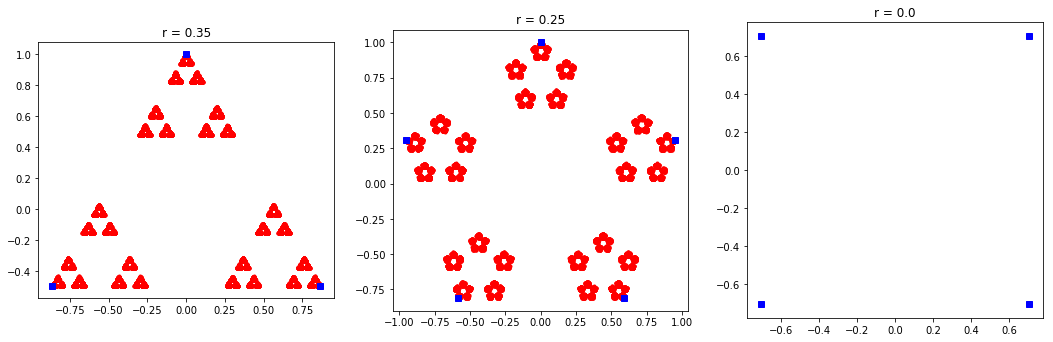

In [11]:
plt.figure(1, figsize=(18, 6))

plt.subplot(131); show_walk(triangle, 10000, 0.35); plt.title('r = 0.35')
plt.subplot(132); show_walk(pentagon, 10000, 0.25); plt.title('r = 0.25')
plt.subplot(133); show_walk(square, 10000, 0.0); plt.title('r = 0.0')
plt.show()

### What happens when r becomes negative?
---
The miniature polygons move outside the bounds of the initial polygon and get larger in size...

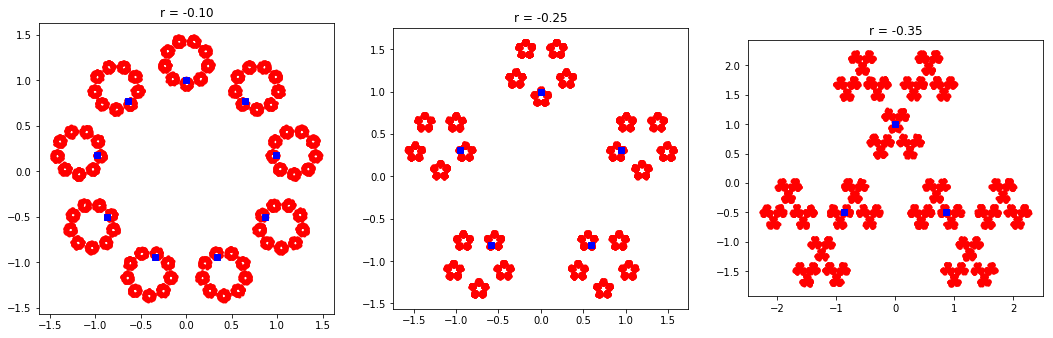

In [12]:
plt.figure(1, figsize=(18, 6))

plt.subplot(131); show_walk(nonagon, 10000, -0.2); plt.title('r = -0.10')
plt.subplot(132); show_walk(pentagon, 10000, -0.25); plt.title('r = -0.25')
plt.subplot(133); show_walk(triangle, 10000, -0.45); plt.title('r = -0.35')
plt.show()

### At r = negative kissing ratio?
---
The miniature polygons make contact once again... Are there **Koch snowflakes** hiding there among the hexagons?

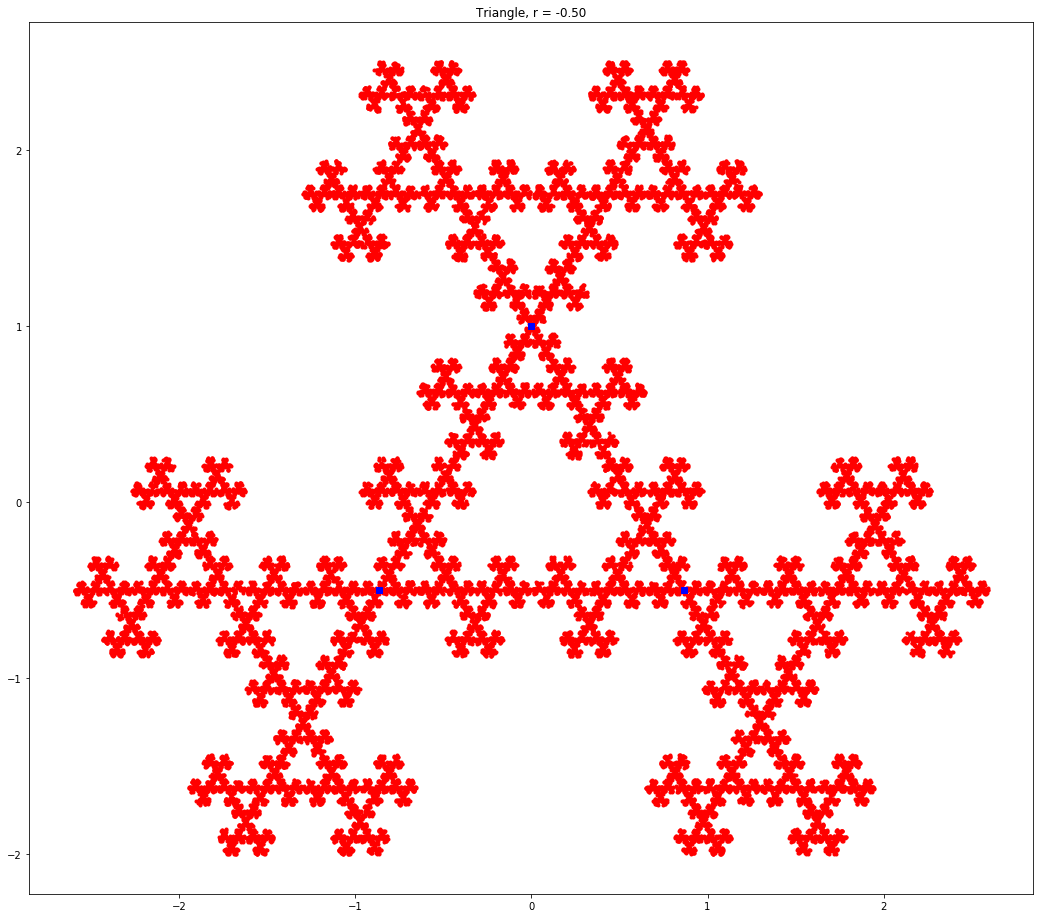

In [13]:
plt.figure(1, figsize=(18, 18))
show_walk(triangle, 50000, -0.5); plt.title('Triangle, r = -0.50')
plt.show()

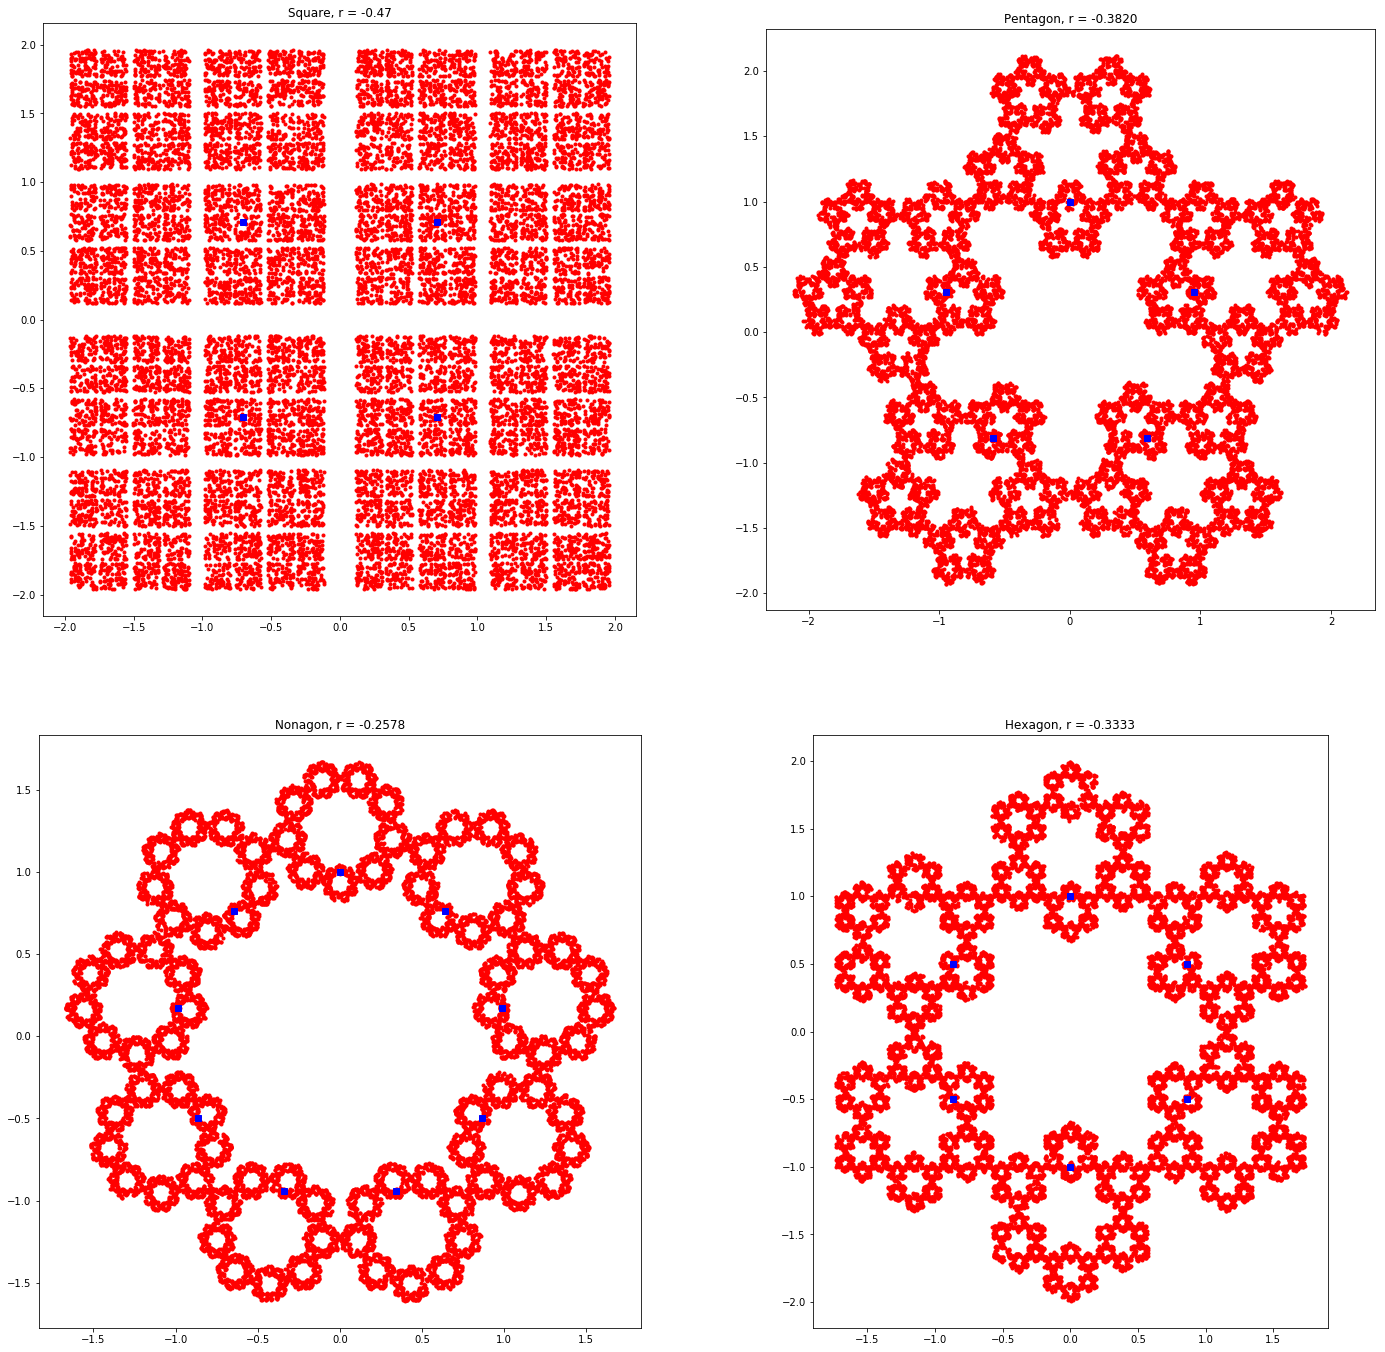

In [14]:
plt.figure(1, figsize=(24, 24))

plt.subplot(221); show_walk(square, 20000, -0.47); plt.title('Square, r = -0.47')
plt.subplot(222); show_walk(pentagon, 20000, -0.3820); plt.title('Pentagon, r = -0.3820')
plt.subplot(223); show_walk(nonagon, 20000, -0.2578); plt.title('Nonagon, r = -0.2578')
plt.subplot(224); show_walk(hexagon, 20000, -0.3333); plt.title('Hexagon, r = -0.3333')
plt.show()

### Return of the blobs
---
The blobs return as r tends towards -1

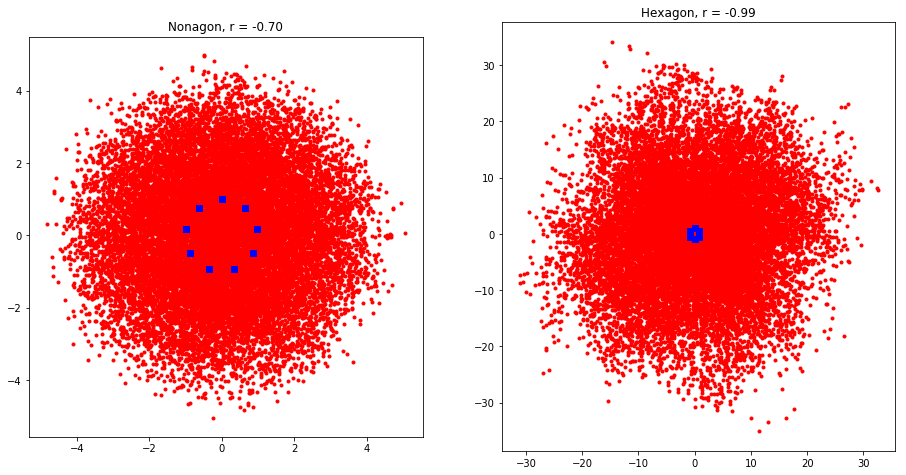

In [15]:
plt.figure(1, figsize=(24, 12))
plt.subplot(132); show_walk(nonagon, 20000, -0.7); plt.title('Nonagon, r = -0.70')
plt.subplot(133); show_walk(hexagon, 20000, -0.99); plt.title('Hexagon, r = -0.99')
plt.show()

## What is happening at r = -1?

When r = -1, we see a twisted, symetrical shape which reminded me of a Julia set.

While all the previous images are stable, these aren't - they change depending on the sequence of randomly chosen vertices, picked while creating the walk.

**Go on - refresh the plots below and see them change. So what is happening here?**


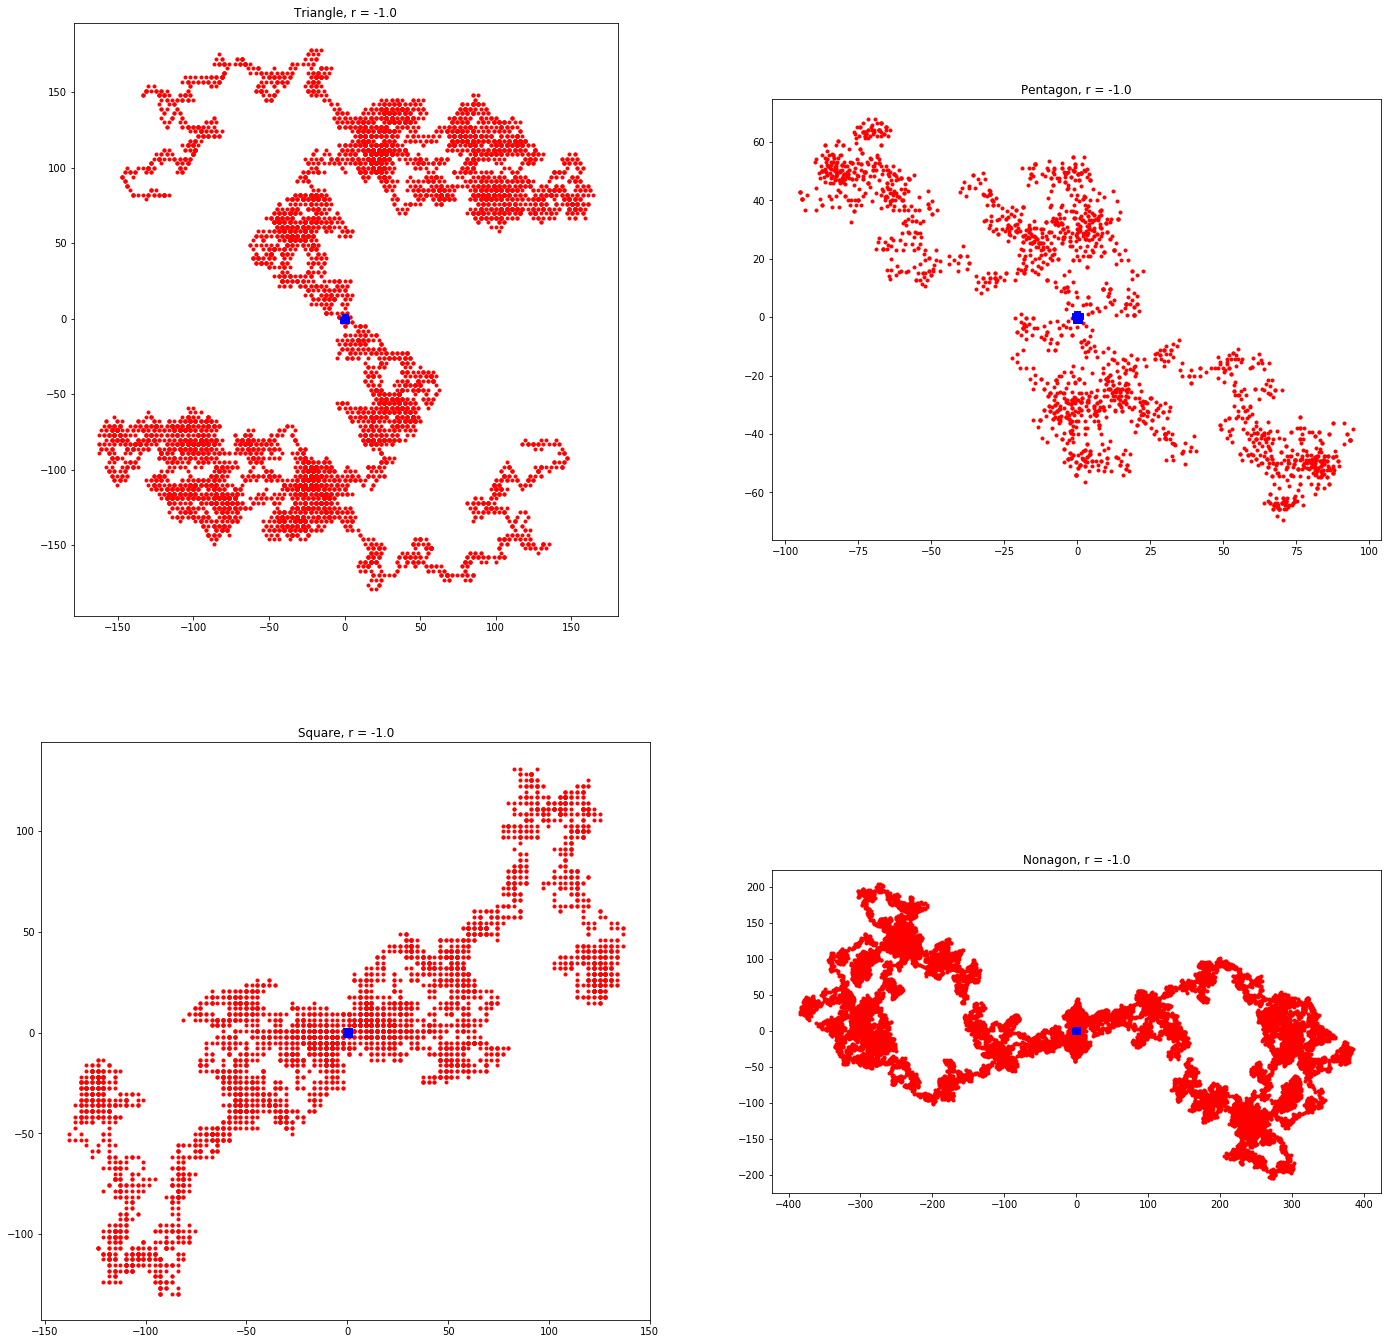

In [16]:
plt.figure(1, figsize=(24,24))

plt.subplot(221); show_walk(triangle, 10000, -1); plt.title('Triangle, r = -1.0')
plt.subplot(222); show_walk(pentagon, 2000, -1); plt.title('Pentagon, r = -1.0')
plt.subplot(223); show_walk(square, 5000, -1); plt.title('Square, r = -1.0')
plt.subplot(224); show_walk(nonagon, 20000, -1); plt.title('Nonagon, r = -1.0')
plt.show()